In [16]:
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
language_folders= os.listdir("/Users/katyhrib/PycharmProjects/semeval/Semevaltraining_data_16_October_release")


In [18]:
def analyze_annotations(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    main_role_counts = Counter()
    fine_grained_role_counts = Counter()

    for line in lines:
        parts = line.strip().split('\t')
        main_role = parts[4]
        fine_grained_roles = parts[5:]
        main_role_counts[main_role] += 1

        for role in fine_grained_roles:
            fine_grained_role_counts[role] += 1

    role_data = pd.DataFrame({
        'Main Role': list(main_role_counts.keys()),
        'Count': list(main_role_counts.values())
    })

    fine_grained_data = pd.DataFrame({
        'Fine-Grained Role': list(fine_grained_role_counts.keys()),
        'Count': list(fine_grained_role_counts.values())
    })

    return role_data, fine_grained_data

In [19]:
def visualize_distribution(role_data, fine_grained_data):
    plt.figure(figsize=(10, 5))
    plt.bar(role_data['Main Role'], role_data['Count'], color='skyblue')
    plt.title('Main Role Distribution')
    plt.xlabel('Main Role')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.bar(fine_grained_data['Fine-Grained Role'], fine_grained_data['Count'], color='salmon')
    plt.title('Fine-Grained Role Distribution')
    plt.xlabel('Fine-Grained Role')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


Langauge folder is PT


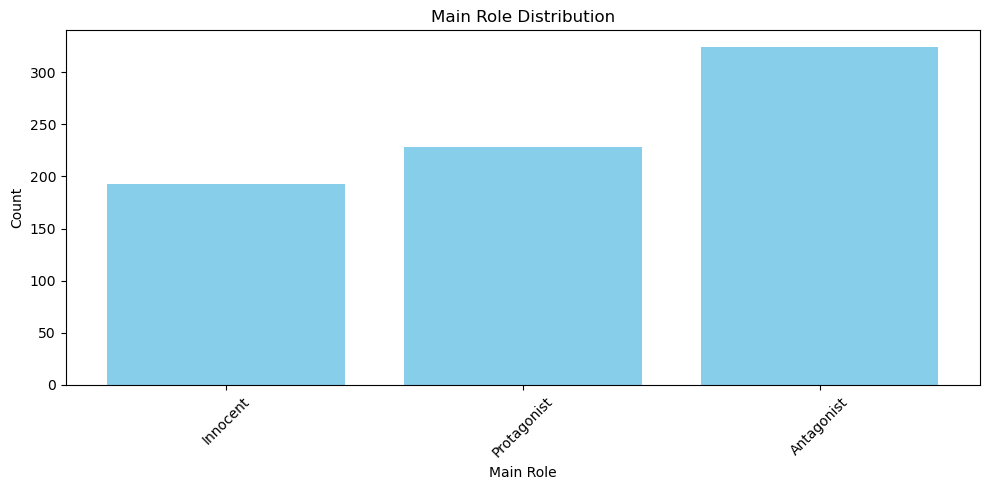

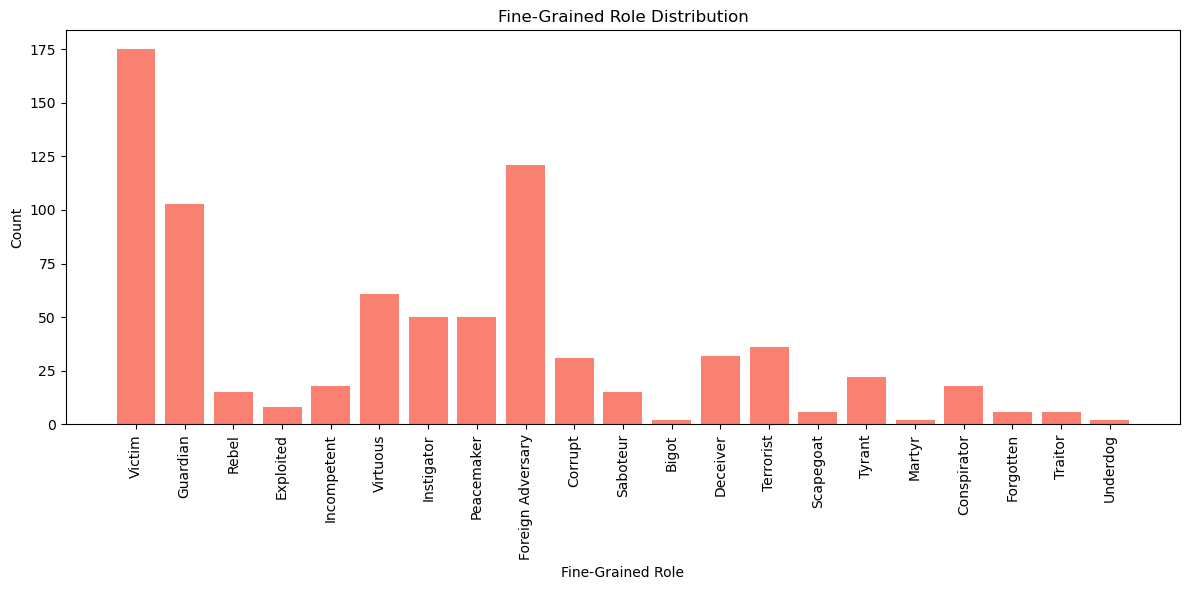

Langauge folder is BG


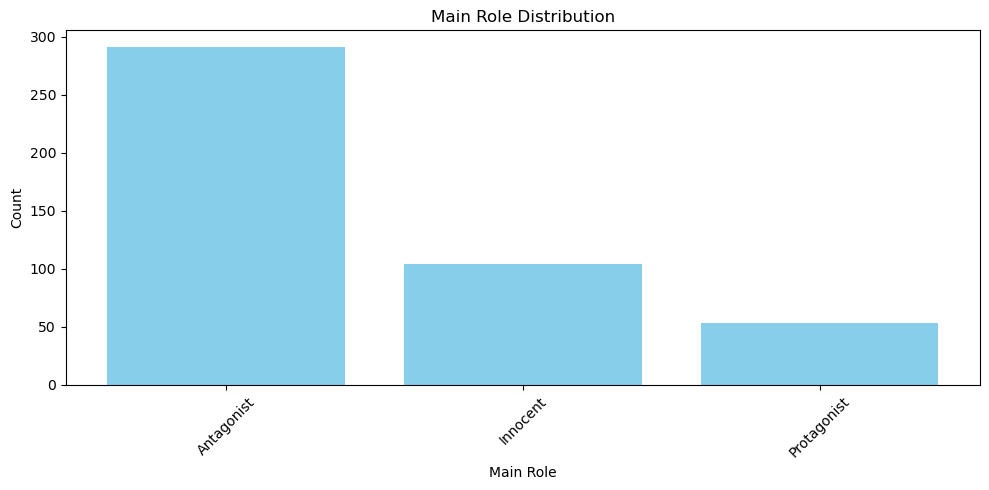

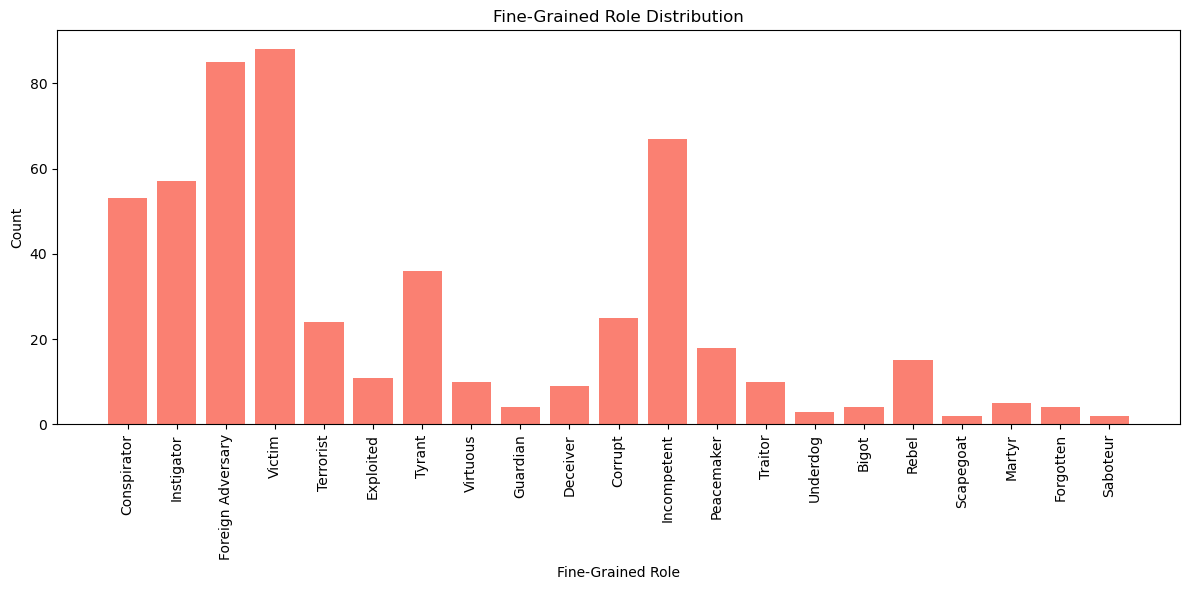

Langauge folder is HI


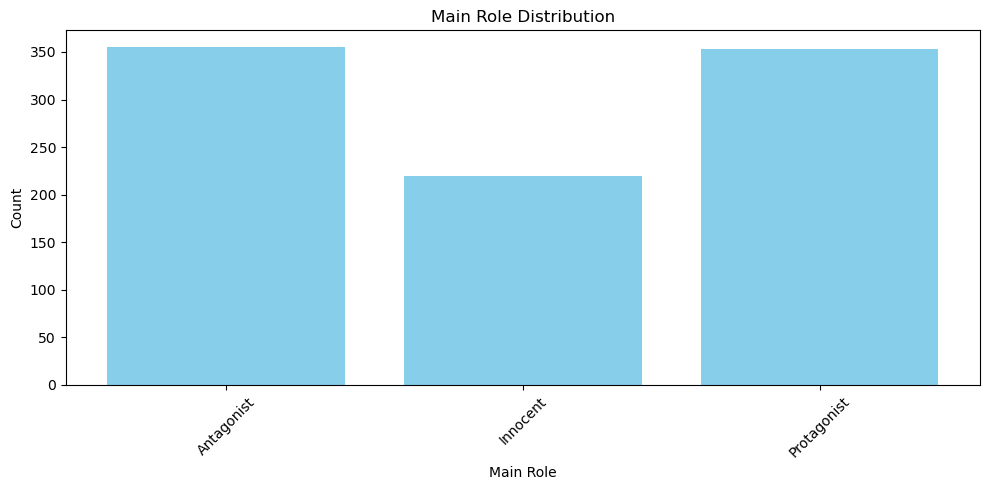

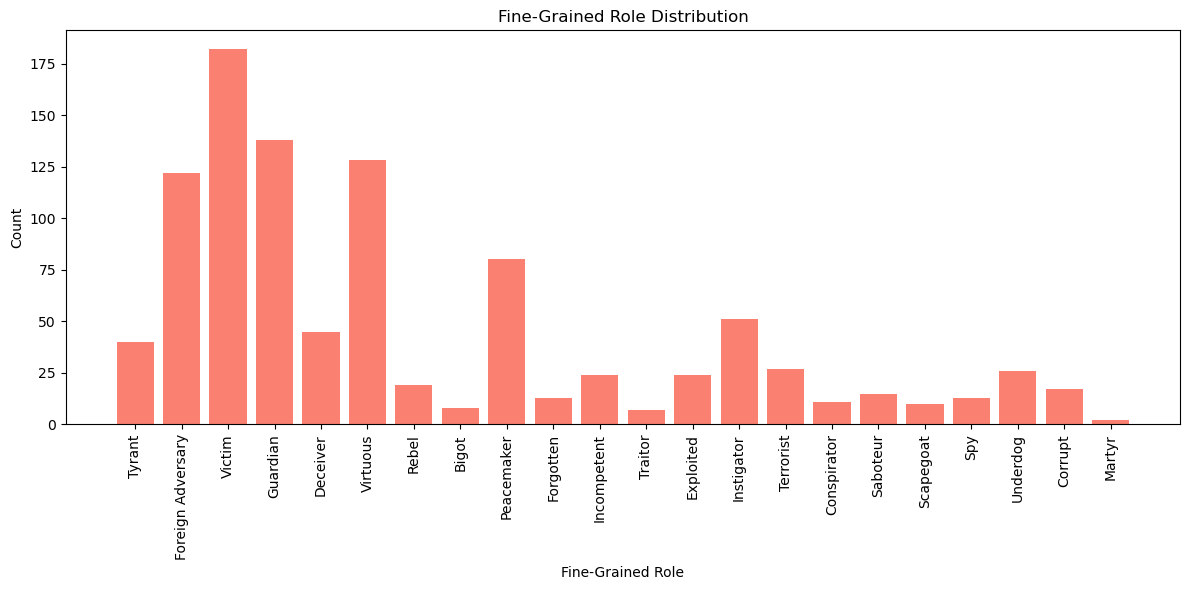

Langauge folder is EN


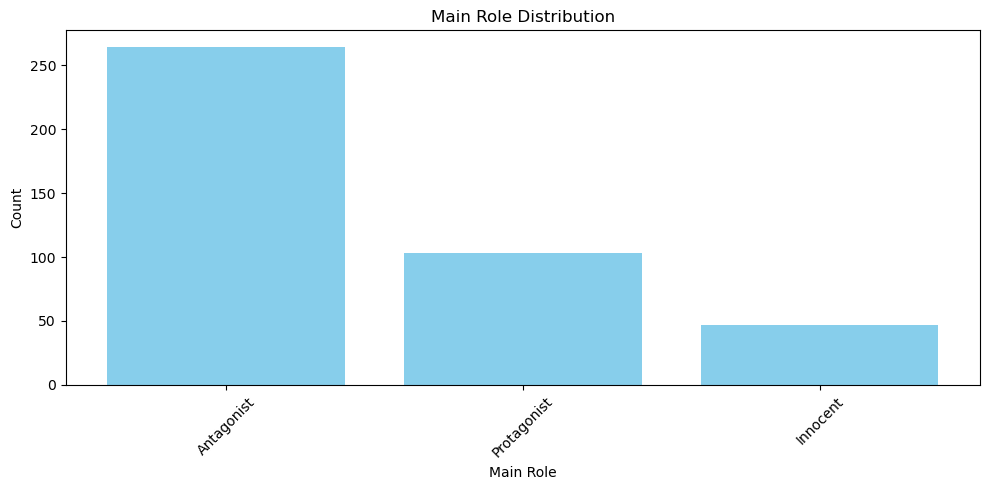

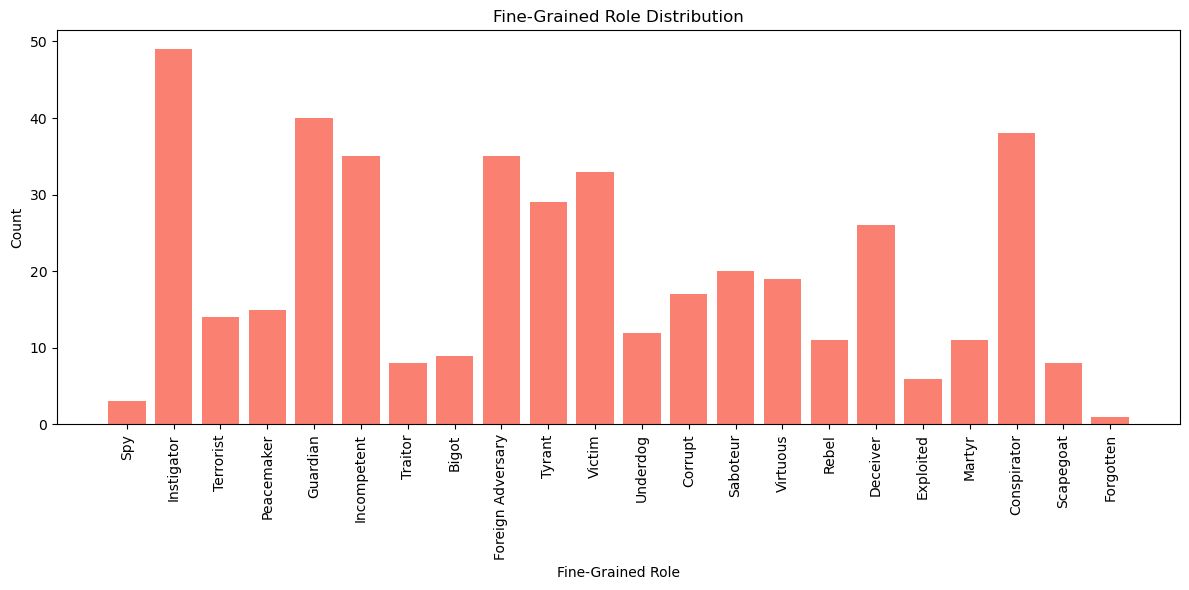

In [20]:
os.chdir("/Users/katyhrib/PycharmProjects/semeval/Semevaltraining_data_16_October_release/")

for language_folder in language_folders:
    os.chdir(language_folder)
    annotation_file_path = 'subtask-1-annotations.txt'
    print(f"Langauge folder is {language_folder}")
    role_data, fine_grained_data = analyze_annotations(annotation_file_path)
    visualize_distribution(role_data, fine_grained_data)
    os.chdir("/Users/katyhrib/PycharmProjects/semeval/Semevaltraining_data_16_October_release/")

In [5]:
def visualize_combined_distribution(all_main_role_counts, all_fine_grained_role_counts):
    role_data = pd.DataFrame({
        'Main Role': list(all_main_role_counts.keys()),
        'Count': list(all_main_role_counts.values())
    })

    fine_grained_data = pd.DataFrame({
        'Fine-Grained Role': list(all_fine_grained_role_counts.keys()),
        'Count': list(all_fine_grained_role_counts.values())
    })

    plt.figure(figsize=(10, 5))
    plt.bar(role_data['Main Role'], role_data['Count'], color='skyblue')
    plt.title('Main Role Distribution Across All Languages')
    plt.xlabel('Main Role')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.bar(fine_grained_data['Fine-Grained Role'], fine_grained_data['Count'], color='salmon')
    plt.title('Fine-Grained Role Distribution Across All Languages')
    plt.xlabel('Fine-Grained Role')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [6]:
def analyze_annotations(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    main_role_counts = Counter()
    fine_grained_role_counts = Counter()

    for line in lines:
        parts = line.strip().split('\t')
        main_role = parts[4]
        fine_grained_roles = parts[5:]

        main_role_counts[main_role] += 1

        for role in fine_grained_roles:
            fine_grained_role_counts[role] += 1

    return main_role_counts, fine_grained_role_counts

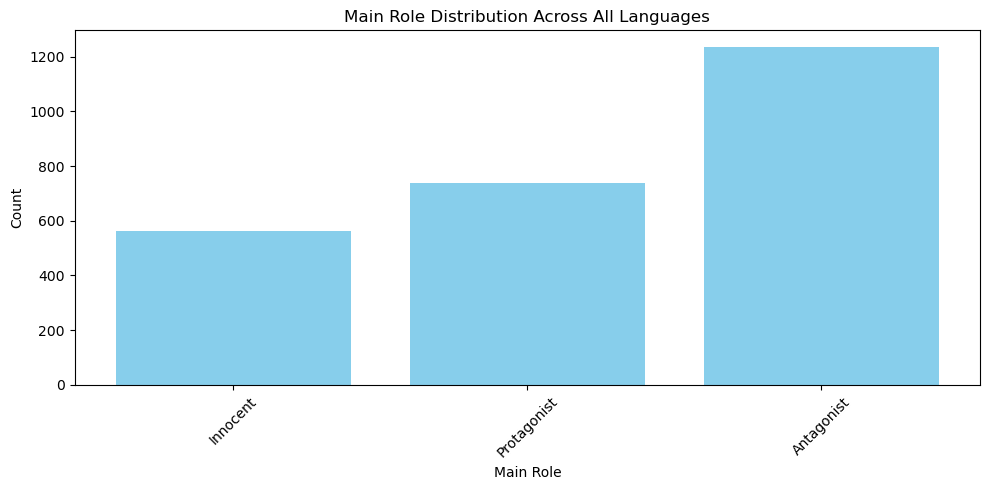

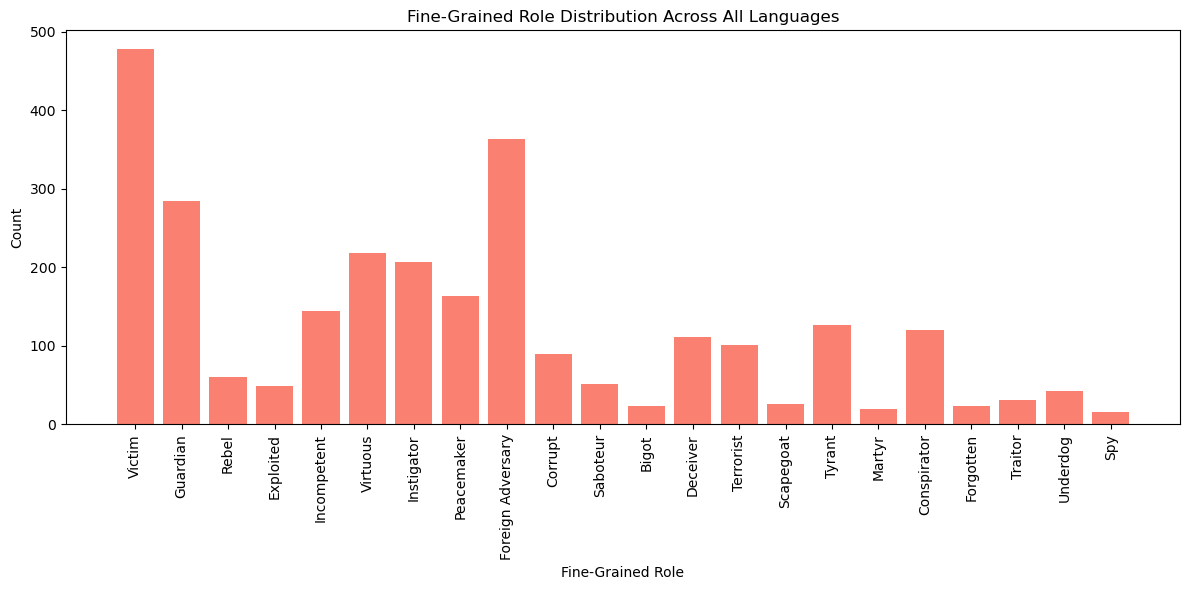

In [7]:
base_directory = "/Users/katyhrib/PycharmProjects/semeval/Semevaltraining_data_16_October_release/"

all_main_role_counts = Counter()
all_fine_grained_role_counts = Counter()

for language_folder in language_folders:
    annotation_file_path = os.path.join(base_directory, language_folder, 'subtask-1-annotations.txt')
    main_role_counts, fine_grained_role_counts = analyze_annotations(annotation_file_path)
    
    all_main_role_counts.update(main_role_counts)
    all_fine_grained_role_counts.update(fine_grained_role_counts)

visualize_combined_distribution(all_main_role_counts, all_fine_grained_role_counts)

In [8]:
from collections import defaultdict

def parse_file(file_path):
    
    parsed_data = defaultdict(list)
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            file_name = parts[0]
            values = parts[1:]
            parsed_data[file_name].append(values)
            
    return parsed_data
